<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing Where Do People Drink?  </h1>
<h2>Description</h2>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>1.0 Importing the Data</b>

Load the csv:

In [94]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')

We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:

In [95]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.

In [96]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:

In [167]:
df_subset = df[["wine_servings", "continent"]]
df_subset_grp = df_subset.groupby("continent", as_index = False)
df_subset_grp.sum()

,continent,wine_servings
0,Africa,862
1,Asia,399
2,Europe,6400
3,North America,564
4,Oceania,570
5,South America,749


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [98]:
# Summary statistics by continent

continents = df["continent"].unique()
df_beer = df[["beer_servings", "continent"]]
for cont in continents:
    print("Summary statistics of beer_servings for continent:", cont)
    df_beer_cont = df_beer[df_beer["continent"] == cont]
    display(df_beer_cont.describe())


Summary statistics of beer_servings for continent: Asia


,beer_servings
count,44.000000
mean,37.045455
std,49.469725
min,0.000000
25%,4.250000
50%,17.500000
75%,60.500000
max,247.000000


Summary statistics of beer_servings for continent: Europe


,beer_servings
count,45.000000
mean,193.777778
std,99.631569
min,0.000000
25%,127.000000
50%,219.000000
75%,270.000000
max,361.000000


Summary statistics of beer_servings for continent: Africa


,beer_servings
count,53.000000
mean,61.471698
std,80.557816
min,0.000000
25%,15.000000
50%,32.000000
75%,76.000000
max,376.000000


Summary statistics of beer_servings for continent: North America


,beer_servings
count,23.000000
mean,145.434783
std,79.621163
min,1.000000
25%,80.000000
50%,143.000000
75%,198.000000
max,285.000000


Summary statistics of beer_servings for continent: South America


,beer_servings
count,12.000000
mean,175.083333
std,65.242845
min,93.000000
25%,129.500000
50%,162.500000
75%,198.000000
max,333.000000


Summary statistics of beer_servings for continent: Oceania


,beer_servings
count,16.000000
mean,89.687500
std,96.641412
min,0.000000
25%,21.000000
50%,52.500000
75%,125.750000
max,306.000000


In [99]:
# Number of entries by continent

df["continent"].value_counts().to_frame()

,continent
Africa,53
Europe,45
Asia,44
North America,23
Oceania,16
South America,12


In [100]:
# mean beer_servings by continent

df_mean_beer_servings = df_beer.groupby("continent", as_index=False).mean()
df_mean_beer_servings.rename(columns={"beer_servings":"mean beer servings"}, inplace=True)
df_mean_beer_servings

,continent,mean beer servings
0,Africa,61.471698
1,Asia,37.045455
2,Europe,193.777778
3,North America,145.434783
4,Oceania,89.687500
5,South America,175.083333


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

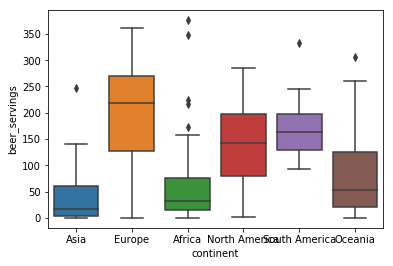

In [101]:
# boxplot of beer_servings by continent

import seaborn as sns
sns.boxplot(x="continent", y="beer_servings", data=df)

From the boxplot above we can intuitively suspect that continent makes a difference in beer_servings.

In [102]:
# ANOVA of beer_servings for the different continents

from scipy import stats
df_group = df.groupby("continent", as_index = False)
f_val, p_val = stats.f_oneway(df_group.get_group('Asia')["beer_servings"], df_group.get_group('Europe')["beer_servings"], 
                              df_group.get_group('Africa')["beer_servings"], df_group.get_group('Oceania')["beer_servings"], 
                              df_group.get_group('North America')["beer_servings"], df_group.get_group('South America')["beer_servings"])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 23.51946538550699 , P = 2.6360344594924106e-18


ANOVA results confirm what we intuitively thought from the boxplots: there is significant difference among the mean of beer_servings of the different continents"

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.

In [103]:
df.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


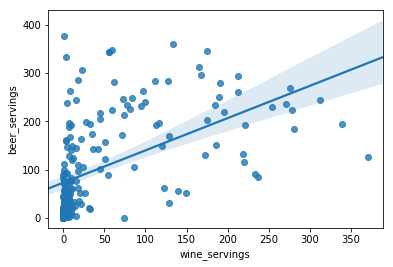

In [104]:
sns.regplot(x="wine_servings", y="beer_servings", data=df)

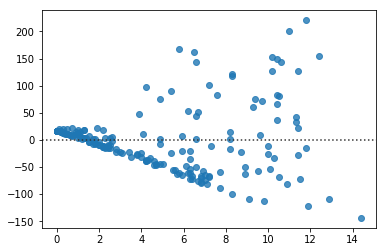

In [112]:
sns.residplot(X,y)

The residual plot shows that the linear model is not a very good assumption.

In [105]:
from scipy import stats
stats.pearsonr(df["beer_servings"], df["wine_servings"])

(0.5271716935065212, 3.378401743961326e-15)

There is a positive correlation between wine_servings and beer_servings

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of #<code>'wine_servings'</code> then calculate $R^{2}$:


In [136]:
# SLR model with predict variable: wine_servings

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = df[["wine_servings"]]
y = df[["total_litres_of_pure_alcohol"]]
lr.fit(x,y)
R_sqr = lr.score(x,y)
print("R^2 is", R_sqr)

R^2 is 0.4456875459787605


# Question 7
Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [137]:
# MLR model with 3 predict variables: "wine_servings", "beer_servings", "spirit_servings">

from sklearn.model_selection import train_test_split
x_data = df[["wine_servings", "beer_servings", "spirit_servings"]]
y_data = df[["total_litres_of_pure_alcohol"]]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=2)
lr.fit(x_train, y_train)
R_sqr = lr.score(x_test, y_test)
print("R^2 is", R_sqr)

R^2 is 0.9217497790368347


In [139]:
# MLR model with additional continent values as dummy variables, 9 predict variables in total.

dummies = pd.get_dummies(df["continent"])
x_data1 = pd.concat([x_data, dummies], axis = 1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data1, y_data, test_size=0.30, random_state=2)
lr.fit(x_train1, y_train1)
R_sqr = lr.score(x_test1, y_test1)
print("R^2 is", R_sqr)

R^2 is 0.9284800363206429


Conclusion: Adding dummy variables improved only a few decimals the $R^{2}$.

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$.

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
R_sqr = pipe.score(x_test, y_test)
print("R^2 is", R_sqr)

R^2 is 0.9261790586186855


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [165]:
# MLR with Ridge alpha hyperparameter = 0.1

from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
R_sqr = RidgeModel.score(x_test, y_test)
print("R^2 is", R_sqr)

R^2 is 0.9217497797804697


<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [166]:
# 2nd order Polynomial with 3 independent variables regression with Ridge alpha hyperparameter = 0.1

poly = PolynomialFeatures(degree=2)
x_train_tr = poly.fit_transform(x_train)
x_test_tr = poly.fit_transform(x_test)
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train_tr, y_train)
RidgeModel.score(x_test_tr, y_test)
print("R^2 is", R_sqr)

R^2 is 0.9217497797804697


<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

<b>Sources</b>

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.